In [1]:
# Import (load) the python packages that are required for this analysis. You may need to download them #
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xbpch
import iris
import iris.plot as iplt

#from gamap_colormap import WhGrYlRd
import sys
from matplotlib.colors import LogNorm
import matplotlib

#import rasterio as rio
import os
# import earthpy as et

# import xesmf as xe
from matplotlib.colors import BoundaryNorm
import numpy.ma as ma
from matplotlib.patches import Polygon
import cartopy
import cartopy.feature as cfeature

In [2]:
# warning suppression - deprecation warnings only

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

# Import PAH concentrations

In this script, I will load in the global and Arctic council state data on the basis of slow ozonolysis (base - slow reaction kinetics) and visualize the global "control" data on BAP.

In [3]:
# Load the data and print an example. (here, BAP)
# print data information to screen so user can see structure and numerical ranges

PAH_Species = ['NAP', 'NAP', 'ACY', 'ACE', 'FLO', 'PHE', 'ANT', 'FLA', 'PYR', 'BAA', 'BBF', 'BKF', 'BAP', 'ICDP', 'DAHA', 'BHP', 'NPYR', 'DNPYR']
PAH_Concentrations = []

PAH_files = ['210105_A/', '210105_B/', '210105_C/', '210105_J/', '201109_K/', '201109_L/', '201109_N/']
PAH_totals =[]

for y in range(0, len(PAH_files)):
    PAH_Concentrations = []
    for x in range(0, len(PAH_Species)):
        conc = iris.load('/net/fs03/d1/jamiekel/mod_analysis/rundir_' 
                         + PAH_files[y] 
                         + PAH_Species[x] 
                         + '.nc')[0]
        print(conc)
        PAH_Concentrations.append(conc[0])
        # print(PAH_Concentrations)
    PAH_totals.append(PAH_Concentrations)

unknown / (1)                       (lev: 47; latitude: 91; longitude: 144)
     Dimension coordinates:
          lev                           x             -              -
          latitude                      -             x              -
          longitude                     -             -              x
     Scalar coordinates:
          time: 2014-03-17 00:00:00, bound=(2014-01-01 00:00:00, 2014-06-01 00:00:00)
     Attributes:
          Conventions: CF-1.5
unknown / (1)                       (lev: 47; latitude: 91; longitude: 144)
     Dimension coordinates:
          lev                           x             -              -
          latitude                      -             x              -
          longitude                     -             -              x
     Scalar coordinates:
          time: 2014-03-17 00:00:00, bound=(2014-01-01 00:00:00, 2014-06-01 00:00:00)
     Attributes:
          Conventions: CF-1.5
unknown / (1)                       (lev: 47; lati

In [4]:
BAP = PAH_totals[2][12]
# print (BAP)
print ('')
print ('printing what this "looks" like to the user...')
print (BAP)
print ('')
print ('printing range (minimum/maximum) values to show user....')
print ('min concentration BAP = ', np.min(BAP.data))
print ('max concentration BAP = ',  np.max(BAP.data))


printing what this "looks" like to the user...
unknown / (1)                       (latitude: 91; longitude: 144)
     Dimension coordinates:
          latitude                           x              -
          longitude                          -              x
     Scalar coordinates:
          lev: 0
          time: 2014-03-17 00:00:00, bound=(2014-01-01 00:00:00, 2014-06-01 00:00:00)
     Attributes:
          Conventions: CF-1.5

printing range (minimum/maximum) values to show user....
min concentration BAP =  0.0
max concentration BAP =  23.74234


# define a plotting function for BAP

In [5]:
# pass the list of all regional concentrations from above
# pass the string for the region you want

def BAP_plotter(totals):
    for i in range(0, len(totals)):
        BAP = totals[i][12]

        # Manually define countour levels 
        contour_levels         = [0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 30]

        # choose a colour scale that you think looks pretty (see link for more options - https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)
        cmap = plt.cm.get_cmap('YlOrRd')

        # combine the countour levels and colour scale 
        norm = BoundaryNorm(contour_levels, ncolors=cmap.N, clip=True)

        # create blank figure with manually-defined size (inches)
        plt.figure(figsize=(10, 7))                                                      

        # define how many sub-plots will be in this, and the geospatial projection
        ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())

        # plot a title 
        plt.title('Simulated (GEOS-Chem) annual-average BAP concentration', fontsize=12)

        # plot countour plot (function = pcolormesh) using data (BAP) according to you colour (cmap + norm) 
        mesh = iplt.pcolormesh(BAP, cmap=cmap, norm=norm)

        # plot a colour bar 
        bar = plt.colorbar(mesh, orientation='horizontal', extend='both')
        bar.set_ticks(contour_levels[1:-1])
        bar.set_ticklabels(contour_levels[1:-1])
        bar.ax.tick_params(labelsize=12, rotation=60)
        bar.set_label('ng m$^{-3}$', fontsize=12)
        plt.gca().autoscale(False)

        # overlay coastlines on the map 
        plt.gca().coastlines()

        # make figure look prettier by trying to expand the images to cover white space
        plt.tight_layout()
        
        source_zones = ['Global', 'Arctic', 'USA', 'Russia', 'LRTAP', 'East Asia', 'ROW']
        for zone in range(0, len(source_zones)):
            if totals[i] == source_zones[zone]:
                title = 'Spatial_Conc_' + totals[i] + '.png'

                # save the figure 
                plt.savefig(title, dpi=300)

/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'lo

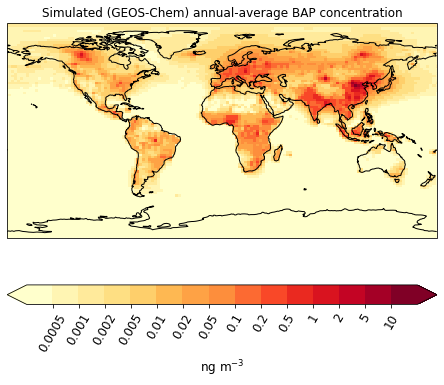

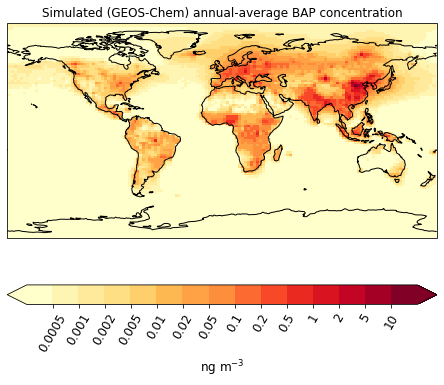

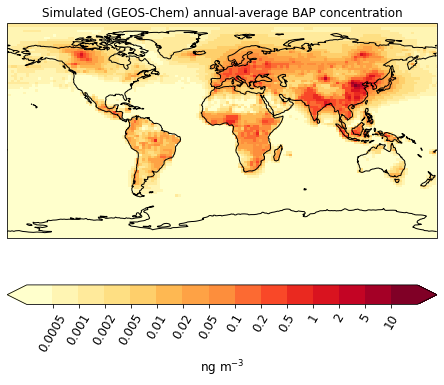

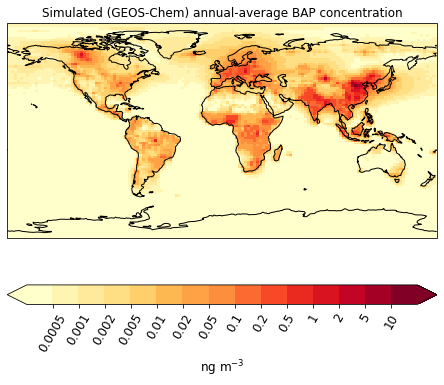

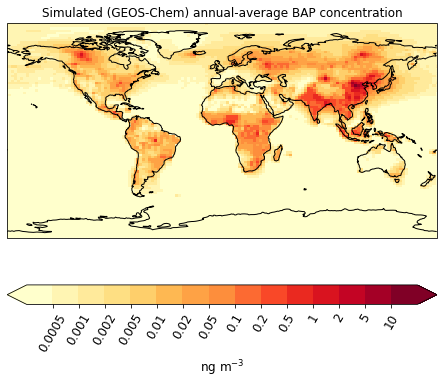

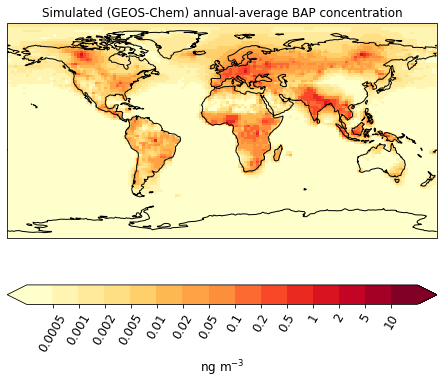

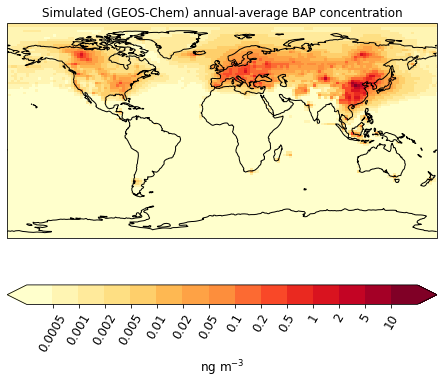

In [6]:
BAP_plotter(PAH_totals)

# plot the individual regions' concentrations

In [7]:
# pass the list of all regional concentrations from above
# pass the string for the regions you want to subtract

def BAP_subtractor(totals, zone_1, zone_2):
    source_zones = ['Global', 'Arctic', 'USA', 'Russia', 'LRTAP', 'East Asia', 'ROW']
    index1 = 0
    index2 = 0
    for zone in range(0, len(source_zones)):
        if zone_1 == source_zones[zone]:
            index1 = source_zones.index(source_zones[zone])
        if zone_2 == source_zones[zone]:
            index2 = source_zones.index(source_zones[zone])
        
    BAP = totals[index1][12] - totals[index2][12]

    # Manually define countour levels 
    contour_levels         = [0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 30]

    # choose a colour scale that you think looks pretty (see link for more options - https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)
    cmap = plt.cm.get_cmap('YlOrRd')

    # combine the countour levels and colour scale 
    norm = BoundaryNorm(contour_levels, ncolors=cmap.N, clip=True)

    # create blank figure with manually-defined size (inches)
    plt.figure(figsize=(10, 7))                                                      

    # define how many sub-plots will be in this, and the geospatial projection
    ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())

    plot_title = 'Simulated (GEOS-Chem) annual-average BAP concentration in ' + zone_2

    # plot a title 
    plt.title(plot_title, fontsize=12)

    # plot countour plot (function = pcolormesh) using data (BAP) according to you colour (cmap + norm) 
    mesh = iplt.pcolormesh(BAP, cmap=cmap, norm=norm)

    # plot a colour bar 
    bar = plt.colorbar(mesh, orientation='horizontal', extend='both')
    bar.set_ticks(contour_levels[1:-1])
    bar.set_ticklabels(contour_levels[1:-1])
    bar.ax.tick_params(labelsize=12, rotation=60)
    bar.set_label('ng m$^{-3}$', fontsize=12)
    plt.gca().autoscale(False)

    # overlay coastlines on the map 
    # plt.gca().coastlines()
    plt.gca().coastlines(resolution='50m', linewidth=0.5, color='black')
    ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)

    # make figure look prettier by trying to expand the images to cover white space
    plt.tight_layout()

    #for zone in range(0, len(source_zones)):
    title = 'Spatial_Conc_' + zone_1 + '_' + zone_2 + 'Slow_Rxns' + '.png'

    # save the figure 
    plt.savefig(title, dpi=300)

/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '


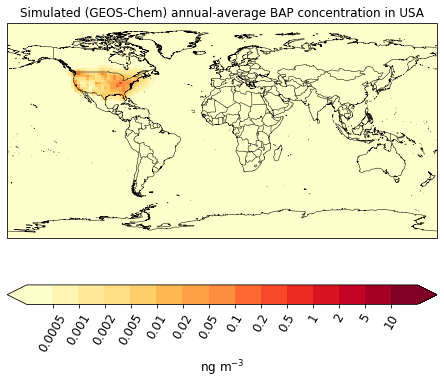

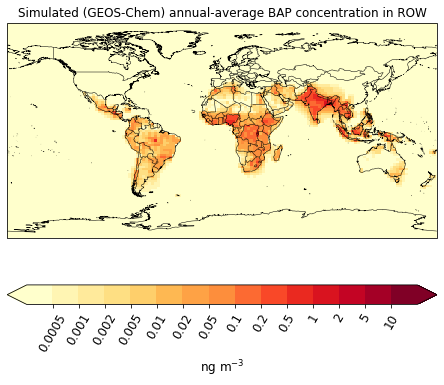

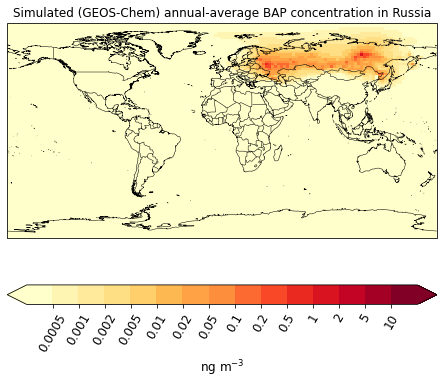

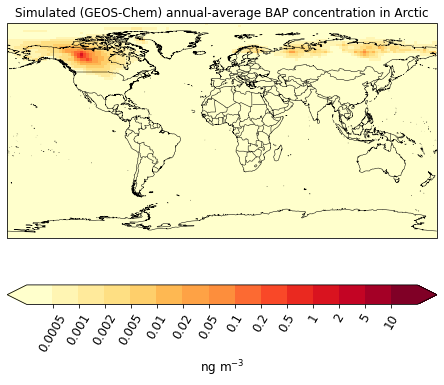

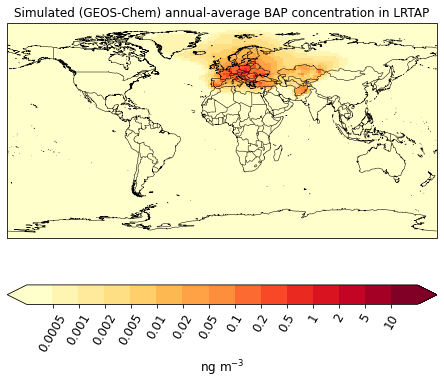

In [8]:
# just calculate concentration differences between global and US sourced pollution here
# can test it with any difference
BAP_subtractor(PAH_totals, 'Global', 'USA')
BAP_subtractor(PAH_totals,  'Global', 'ROW')
BAP_subtractor(PAH_totals,  'Global', 'Russia')
BAP_subtractor(PAH_totals,  'Global', 'Arctic')
BAP_subtractor(PAH_totals,  'Global', 'LRTAP')

# load information for incremental lifetime cancer risk calculations

In [9]:
# load in population, mask, mortality files

pop_dens_path = 'PKU_PAH_emissions/HTAP/gpw_v4_population_density_rev11_2015_1_deg_2_25.nc'
mask_path = 'PKU_PAH_emissions/HTAP/region_mask_Arctic_ext.nc'
SA_path = 'mod_analysis/rundir_201215_A/Surface_Area_GridCells.nc'

mask = iris.load('/net/fs11/d0/jamiekel/' + mask_path)[0]
SA = iris.load('/net/fs11/d0/jamiekel/' + SA_path)[0]
pop_dens = iris.load('/net/fs11/d0/jamiekel/' + pop_dens_path)[0]
#print(pop_dens)

In [10]:
mask

<iris 'Cube' of source_code / (Degree) (latitude: 91; longitude: 144)>

# define general plotting function
## phase out the BAP plotter above in your next code cleanup

In [11]:
# plotting function
# takes Iris cube, contour levels, title, color scheme

def _plotter(cube, contour_lev, color_scheme, plot_title, plot_size):

    # combine the countour levels and colour scale 
    norm = BoundaryNorm(contour_lev, ncolors=color_scheme.N, clip=True)

    # create blank figure with manually-defined size (inches)
    plt.figure(figsize=plot_size)                                                      

    # define how many sub-plots will be in this, and the geospatial projection
    ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())

    plot_title = 'mask plot'

    # plot a title 
    plt.title(plot_title, fontsize=12)

    # plot countour plot (function = pcolormesh) using data (BAP) according to you colour (cmap + norm) 
    mesh = iplt.pcolormesh(cube, cmap=color_scheme, norm=norm)

    # plot a colour bar 
    bar = plt.colorbar(mesh, orientation='horizontal', extend='both')
    bar.set_ticks(contour_lev[1:-1])
    bar.set_ticklabels(contour_lev[1:-1])
    bar.ax.tick_params(labelsize=12, rotation=60)
    bar.set_label('ng m$^{-3}$', fontsize=12)
    plt.gca().autoscale(False)

    # overlay coastlines on the map 
    # plt.gca().coastlines()
    plt.gca().coastlines(resolution='50m', linewidth=0.5, color='black')
    ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)

    # make figure look prettier by trying to expand the images to cover white space
    plt.tight_layout()

    #for zone in range(0, len(source_zones)):
    title = plot_title + '.png'

    # save the figure 
    plt.savefig(title, dpi=300)

# plot the mask regions

/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '


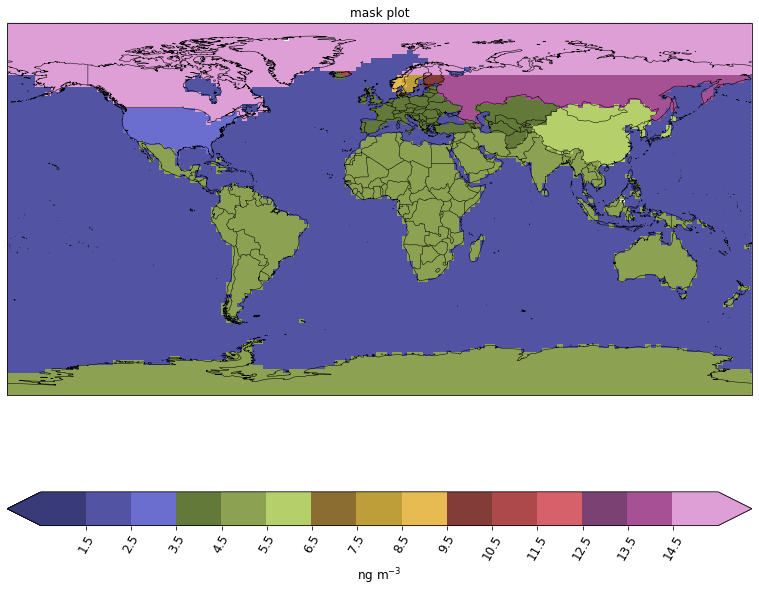

In [12]:
cont_lev = np.arange(0.5, 16.5, 1)
mask_title = 'Mask Plot'
schema = plt.cm.get_cmap('tab20b')
mask_fig_size = (15, 12)

# plot the mask plot
_plotter(mask, cont_lev, schema, mask_title, mask_fig_size)

Recording for future use:

- 2 = ocean
- 3 = USA
- 4 = LRTAP? includes Europe and central  asia
- 5 = rest of the world / global south
- 6-11 = scandinavia? a section that doesn't fully make sense
- 14 = russia
- 15 = arctic 

# run some tests on pop density, SA, other attributes for sanity

In [13]:
# test some grid square somewhere in LRTAP
mask.data[70,100]

4

In [14]:
# check the population density in that grid square
pop_dens.data[70,100]

3.4009948

is this the surface area of one grid square or the cumulative surface area to this point?
## ASK JAMIE

In [15]:
# get test surface area, which doesn't look right bc it varies with point (weird)

SA.data[70,100]

39786025000.0

In [16]:
# test the population density bounds, because Jamie thinks neg numbers may be present
# doesn't *look* like there are negative numbers, but could be mistaken

print(pop_dens.data, "\n population density\n")
print(pop_dens.data.min, "\n min val\n")
print(pop_dens.data.max, "\n max val\n")

[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]] 
 population density

<bound method MaskedArray.min of masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-3.402823e+38,
  dtype=float32)> 
 min val

<bound method MaskedArray.max of masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --

# cancer risk calculations

In [83]:
# calculate cancer risk (unitless value) from this simple case, one point in LRTAP

# estimating the unit risk using Armstrong et al. 2004, cited in Kelly et al. 2021
URe = 32.7 * 10**(-6)  # m^3 / ng
test_pop_dens = pop_dens.data[70,100] # people / km^2
test_SA_meters = SA.data[70,100] #m^2 
test_SA = test_SA_meters / 10**6

# calculate unitless value for cancer risk at this single grid square in LRTAP
# divide by 70 to get ILCR, which is the average life expectancy
test_unitless = BAP.data[70,100] * URe
print(test_unitless)
test_CR = BAP.data[70,100] * URe  * test_pop_dens * test_SA  / 70
print(test_CR)

4.927729723043741e-07
0.0009525446789873977


In [18]:
# do the cancer calculation for LRTAP, which is region 4 in the mask

# first, define a function for the cancer risk calculation
# takes unit risk, population density, surface area, optional TEQ
# pass the cube version of population density and surface area

def _ILCR(conc, unit_risk, pd, surf, lat, long, teq=1):
    ILCR = conc.data[lat,long] * unit_risk * pd.data[lat, long] * surf.data[lat,long] * teq
    return ILCR

In [19]:
# calculate ILCR from BAP at  70,  100, just for sanity's sake
print(_ILCR(BAP, URe, pop_dens, SA, 70, 100, 1))

66678.12752911783


In [85]:
# extract the LRTAP region

# get shape of the cubes, in this case, the same for concentration & mask
lat_cube = BAP.shape[0]
long_cube = BAP.shape[1]

# save a copy to mess with
BAP_masked = BAP

# set all non-LRTAP points to NaN
for lat in range(0, lat_cube):
    for long in range(0, long_cube):
        if (mask.data[lat, long] != 4):
            BAP_masked.data[lat, long] = float("NaN")
print(BAP_masked.data)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [21]:
# sanity check
BAP.data[70,100]

0.01506951

In [22]:
# sanity check: did you save the LRTAP region's data?
BAP_masked.data[70,100]

0.01506951

In [23]:
test_ILCR_1 = _ILCR(BAP_masked, URe, pop_dens, SA, 70, 100, 1)
test_ILCR_1

66678.12752911783

In [24]:
test_ILCR_2 = _ILCR(BAP_masked, URe, pop_dens, SA, 70, 101, 1)
test_ILCR_2

361941.3443482225

In [25]:
reg_ILCR = np.zeros((91,144))
reg_ILCR_sum = 0

In [26]:
reg_ILCR[70,100]

0.0

In [27]:
reg_ILCR_sum

0

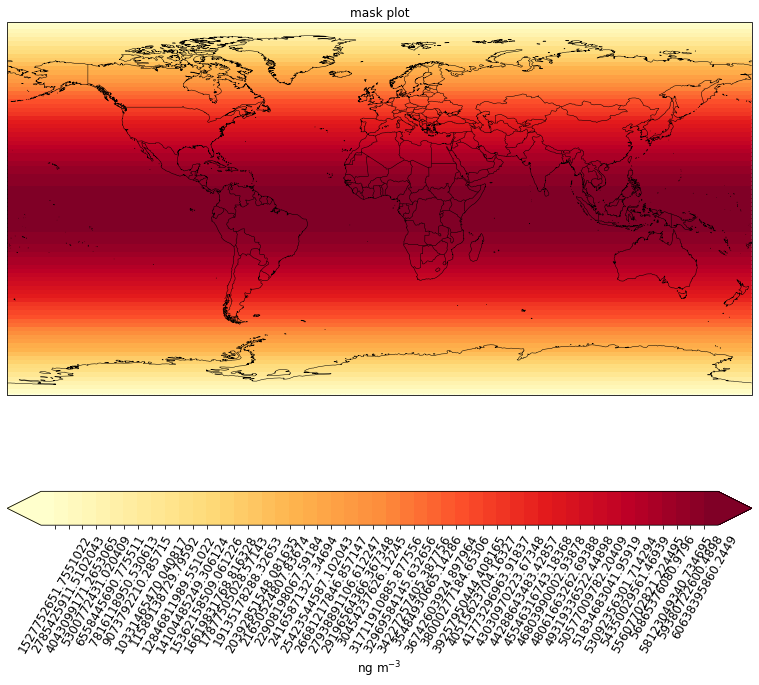

In [76]:
SA_contour = np.linspace(np.min(SA.data), np.max(SA.data))
SA_color = plt.cm.get_cmap('YlOrRd')

# _plotter(pop_dens, pop_contour, pop_color, 'population density', mask_fig_size)
_plotter(SA, SA_contour, SA_color, 'population density', mask_fig_size)

In [79]:
# sanity check the total surface area, which is probably in meters (but check)
# Iris is designed for our types of grids

# sometimes latitude and longitude are specified as just 'lat' and 'long'
# can also use iris.analysis.AVERAGE

#SA.coord('latitude').guess_bounds()
#SA.coord('longitude').guess_bounds()
SA_total = SA.collapsed(['longitude', 'latitude'], iris.analysis.SUM)
print(SA_total.data)

# surface area is in meters, convert it later

510705170000000.0


/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))


In [80]:
pop_dens_total = pop_dens.collapsed(['longitude', 'latitude'], iris.analysis.SUM)
print(pop_dens_total.data)

157085.44


/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


In [53]:
import math

counter = 0
inf_counter = 0
for i in range(0, np.shape(pop_dens.data)[0]):
    for j in range(0, np.shape(pop_dens.data)[1]):
        if (math.isnan(pop_dens.data[i,j]) == True):
            counter +=1
        if (math.isinf(pop_dens.data[i,j]) == True):
            inf_counter +=1
print(counter)
print(inf_counter)

9781
0


<ipython-input-53-7d98e0909a0e>:7: UserWarning: Warning: converting a masked element to nan.
  if (math.isnan(pop_dens.data[i,j]) == True):
<ipython-input-53-7d98e0909a0e>:9: UserWarning: Warning: converting a masked element to nan.
  if (math.isinf(pop_dens.data[i,j]) == True):


In [ ]:
pop_gridcell.data[region_mask_Arctic_ext.data != arc_int]  = np.nan

In [57]:
pd_nonan = pop_dens

for i in range(0, np.shape(pd_nonan.data)[0]):
    for j in range(0, np.shape(pd_nonan.data)[1]):
        np.nan_to_num(pd_nonan.data[i,j])
    

TypeError: This operation is not supported for complex values because it would be ambiguous.

ValueError: Axis limits cannot be NaN or Inf

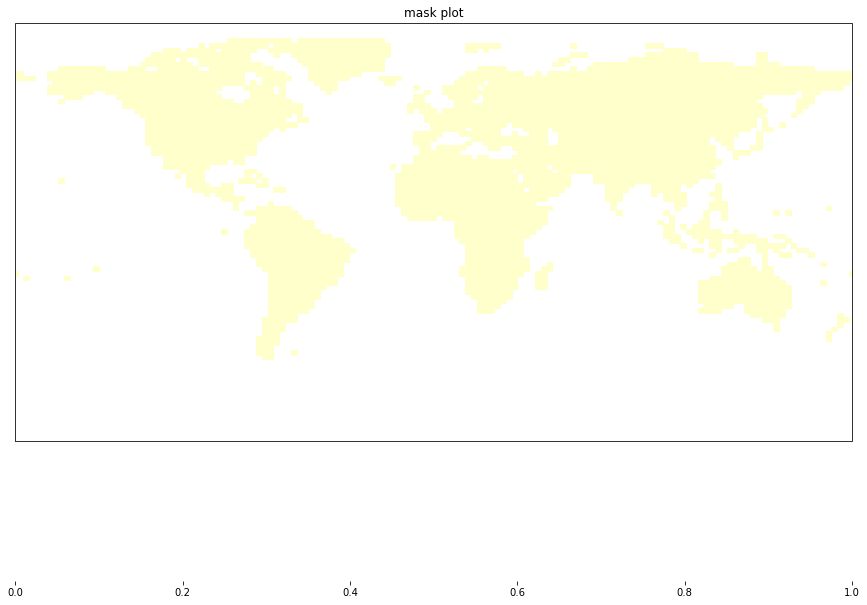

In [56]:
pop_contour = np.logspace(0.1, 1000, 100)
pop_color = plt.cm.get_cmap('YlOrRd')

# _plotter(pop_dens, pop_contour, pop_color, 'population density', mask_fig_size)
_plotter(pd_nonan, pop_contour, pop_color, 'population density', mask_fig_size)

In [54]:
# calculate ILCR over the whole region

ILCR_total = 0
for lat in range(0, 91):
    for long in range(0, 144):
        if (mask.data[lat, long] == 4):
            print(BAP_masked.data[lat,long], "BAP conc")
            print(pop_dens.data[lat, long], "here's pop dens")
            print(SA.data[lat, long], "here's SA")
            ILCR = _ILCR(BAP_masked, URe, pop_dens, SA, lat, long, 1)
            print(math.isnan(pop_dens.data[lat,long]))
            #print(ILCR, "ILCR calc")
            ILCR_total += ILCR
            # reg_ILCR[lat, long] = ILCR
            # reg_ILCR_sum = reg_ILCR_sum + ILCR
            print(ILCR_total, "here's the total\n")
            
# print(reg_ILCR, "\n this is the array \n")
# print(reg_ILCR_sum, "\n this is the sum\n")

0.018586833 BAP conc
2.5026674 here's pop dens
53603570000.0 here's SA
False
81536.11291071771 here's the total

0.02325805 BAP conc
6.314559 here's pop dens
53603570000.0 here's SA
False
338965.31203220476 here's the total

0.024532681 BAP conc
13.461642 here's pop dens
52490842000.0 here's SA
False
905823.4106651102 here's the total

0.04352494 BAP conc
42.44912 here's pop dens
52490842000.0 here's SA
False
4077129.465232501 here's the total

0.0554535 BAP conc
23.556953 here's pop dens
52490842000.0 here's SA
False
6319355.502412289 here's the total

0.039263044 BAP conc
64.557106 here's pop dens
51314168000.0 here's SA
False
10572528.59819863 here's the total

0.047464315 BAP conc
18.846266 here's pop dens
51314168000.0 here's SA
False
12073517.809602017 here's the total

0.059796244 BAP conc
34.17257 here's pop dens
51314168000.0 here's SA
False
15502273.80516574 here's the total

0.17912659 BAP conc
239.5683 here's pop dens
51314168000.0 here's SA
False
87509229.52925119 here's t

<ipython-input-54-1147fe5f4e79>:11: UserWarning: Warning: converting a masked element to nan.
  print(math.isnan(pop_dens.data[lat,long]))


here's pop dens
39786025000.0 here's SA
False
-- here's the total

0.035730153 BAP conc
3.887396 here's pop dens
39786025000.0 here's SA
False
-- here's the total

0.034556326 BAP conc
3.0501978 here's pop dens
39786025000.0 here's SA
False
-- here's the total

0.029964643 BAP conc
1.8313289 here's pop dens
39786025000.0 here's SA
False
-- here's the total

0.026725171 BAP conc
2.221327 here's pop dens
39786025000.0 here's SA
False
-- here's the total

0.022319376 BAP conc
30.395473 here's pop dens
39786025000.0 here's SA
False
-- here's the total

0.022365915 BAP conc
1.6220106 here's pop dens
39786025000.0 here's SA
False
-- here's the total

0.016660148 BAP conc
0.49699903 here's pop dens
39786025000.0 here's SA
False
-- here's the total

0.015128778 BAP conc
0.5448405 here's pop dens
39786025000.0 here's SA
False
-- here's the total

0.020894542 BAP conc
1.6249937 here's pop dens
39786025000.0 here's SA
False
-- here's the total

0.01506951 BAP conc
3.4009948 here's pop dens
397860

Here's how I'll test the population density units: 
1. mask out everything but the US in population density
2. calculate the total population density
3. mask out  everything but the US in surface area
4. calculate the  total surface area
5. multiply the  two totals, should get population
6. if the population isn't  the same as the population listed in census, check whether  the surface area is correct for  the continental US. if it's off by several orders of magnitude, that's improperly in meters or km, and convert it accordingly.


In [ ]:
# here is the order for the cancer calculation

# concentration x 
# unit risk x 
# population density x 
# surface area of grid cell
# then sum them up over the region

# then, figure out which grid points in the BAP concentration calculator are LRTAP
# compare all points in BAP iris cube to mask iris cub
# for all grid points where mask cube = 4, keep
# for all others, set to NaN in a resultant cube

# then, run the cancer calculation at all points in the resultant cube
# add up the results to get the cancer risk in the USA
# yay

In [ ]:
# pass the list of all regional concentrations from above
# pass the string for the regions you want to calculate cancer for

def BAP_cancer_calc(totals, zone_1, zone_2):
    source_zones = ['Global', 'Arctic', 'USA', 'Russia', 'LRTAP', 'East Asia', 'ROW']
    index1 = 0
    index2 = 0
    for zone in range(0, len(source_zones)):
        if zone_1 == source_zones[zone]:
            index1 = source_zones.index(source_zones[zone])
        if zone_2 == source_zones[zone]:
            index2 = source_zones.index(source_zones[zone])
        
    BAP = totals[index1][12] - totals[index2][12]
    
    # conduct the cancer calculation

    # Manually define countour levels 
    contour_levels         = [0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 30]

    # choose a colour scale that you think looks pretty (see link for more options - https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)
    cmap = plt.cm.get_cmap('YlOrRd')

    # combine the countour levels and colour scale 
    norm = BoundaryNorm(contour_levels, ncolors=cmap.N, clip=True)

    # create blank figure with manually-defined size (inches)
    plt.figure(figsize=(10, 7))                                                      

    # define how many sub-plots will be in this, and the geospatial projection
    ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())

    plot_title = 'Simulated (GEOS-Chem) annual-average BAP concentration in ' + zone_2

    # plot a title 
    plt.title(plot_title, fontsize=12)

    # plot countour plot (function = pcolormesh) using data (BAP) according to you colour (cmap + norm) 
    mesh = iplt.pcolormesh(BAP, cmap=cmap, norm=norm)

    # plot a colour bar 
    bar = plt.colorbar(mesh, orientation='horizontal', extend='both')
    bar.set_ticks(contour_levels[1:-1])
    bar.set_ticklabels(contour_levels[1:-1])
    bar.ax.tick_params(labelsize=12, rotation=60)
    bar.set_label('ng m$^{-3}$', fontsize=12)
    plt.gca().autoscale(False)

    # overlay coastlines on the map 
    # plt.gca().coastlines()
    plt.gca().coastlines(resolution='50m', linewidth=0.5, color='black')
    ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
    
    # add the mask
    #plt.plot(mask)

    # make figure look prettier by trying to expand the images to cover white space
    #plt.tight_layout()

    #for zone in range(0, len(source_zones)):
    # title = 'Spatial_Conc_' + zone_1 + '_' + zone_2 + 'Slow_Rxn' + '.png'

    # save the figure 
    #plt.savefig(title, dpi=300)

In [ ]:
# BAP_cancer_calc(PAH_totals, 'Global', 'USA')

In [ ]:
#  THIS CODE WORKS DO NOT DELETE

        # print (BAP)
#         print ('')
#         print ('printing what this "looks" like to the user...')
#         print (BAP)
#         print ('')
#         print ('printing range (minimum/maximum) values to show user....')
#         print ('min concentration BAP = ', np.min(BAP.data))
#         print ('max concentration BAP = ',  np.max(BAP.data))

# # Manually define countour levels 
# contour_levels         = [0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 30]

# # choose a colour scale that you think looks pretty (see link for more options - https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)
# cmap = plt.cm.get_cmap('YlOrRd')

# # combine the countour levels and colour scale 
# norm = BoundaryNorm(contour_levels, ncolors=cmap.N, clip=True)

# # create blank figure with manually-defined size (inches)
# plt.figure(figsize=(10, 7))                                                      

# # define how many sub-plots will be in this, and the geospatial projection
# ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())

# # plot a title 
# plt.title('Simulated (GEOS-Chem) annual-average BAP concentration', fontsize=12)

# # plot countour plot (function = pcolormesh) using data (BAP) according to you colour (cmap + norm) 
# mesh = iplt.pcolormesh(BAP, cmap=cmap, norm=norm)

# # plot a colour bar 
# bar = plt.colorbar(mesh, orientation='horizontal', extend='both')
# bar.set_ticks(contour_levels[1:-1])
# bar.set_ticklabels(contour_levels[1:-1])
# bar.ax.tick_params(labelsize=12, rotation=60)
# bar.set_label('ng m$^{-3}$', fontsize=12)
# plt.gca().autoscale(False)

# # overlay coastlines on the map 
# plt.gca().coastlines()

# # make figure look prettier by trying to expand the images to cover white space
# plt.tight_layout()

# # save the figure 
# plt.savefig('Spatial_Conc_Global_Source.png', dpi=300)

In [ ]:
#  other nonsense
#     cancer_calc = 0
#     for lat in range(0, lat_max):
#         for long in range(0, long_max):
#     cancer_calc += unit_risk * pd.data[lat, long] * surf.data[lat, long] * teq
#     return cancer_calc
#     # return unit_risk * pd * surf * teq